In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *


sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [2]:
query_dict = {
             'clusters__vectors__algorithm__in': ['turian'],
             'clusters__vectors__composer__in': ['Add', 'Socher'],
             'clusters__vectors__unlabelled__in': ['turian'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}

def go(query_dict):
    ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
    print(ids)
    df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                      'Composer':'clusters__vectors__composer',
                                      'Unlabelled':'clusters__vectors__unlabelled'})
    df = df.convert_objects(convert_numeric=True)
    g = sns.tsplot(data=df, time='Clusters', condition='Composer', 
               value='Accuracy', unit='folds',
               marker='s', linewidth=4, ci=68) 
    g.legend(loc='lower right')
    g.set(ylim=(0.45, .8), xlim=(0, 2000))

# g.set(xscale='log')
# sns.despine(left=True)

[240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
Calculating CI for exp 240
Calculating CI for exp 241
Calculating CI for exp 242
Calculating CI for exp 243
Calculating CI for exp 244
Calculating CI for exp 245
Calculating CI for exp 246
Calculating CI for exp 247
Calculating CI for exp 248
Calculating CI for exp 249
Unlabelled has 5000 values
Clusters has 5000 values
folds has 5000 values
Accuracy has 5000 values
Composer has 5000 values


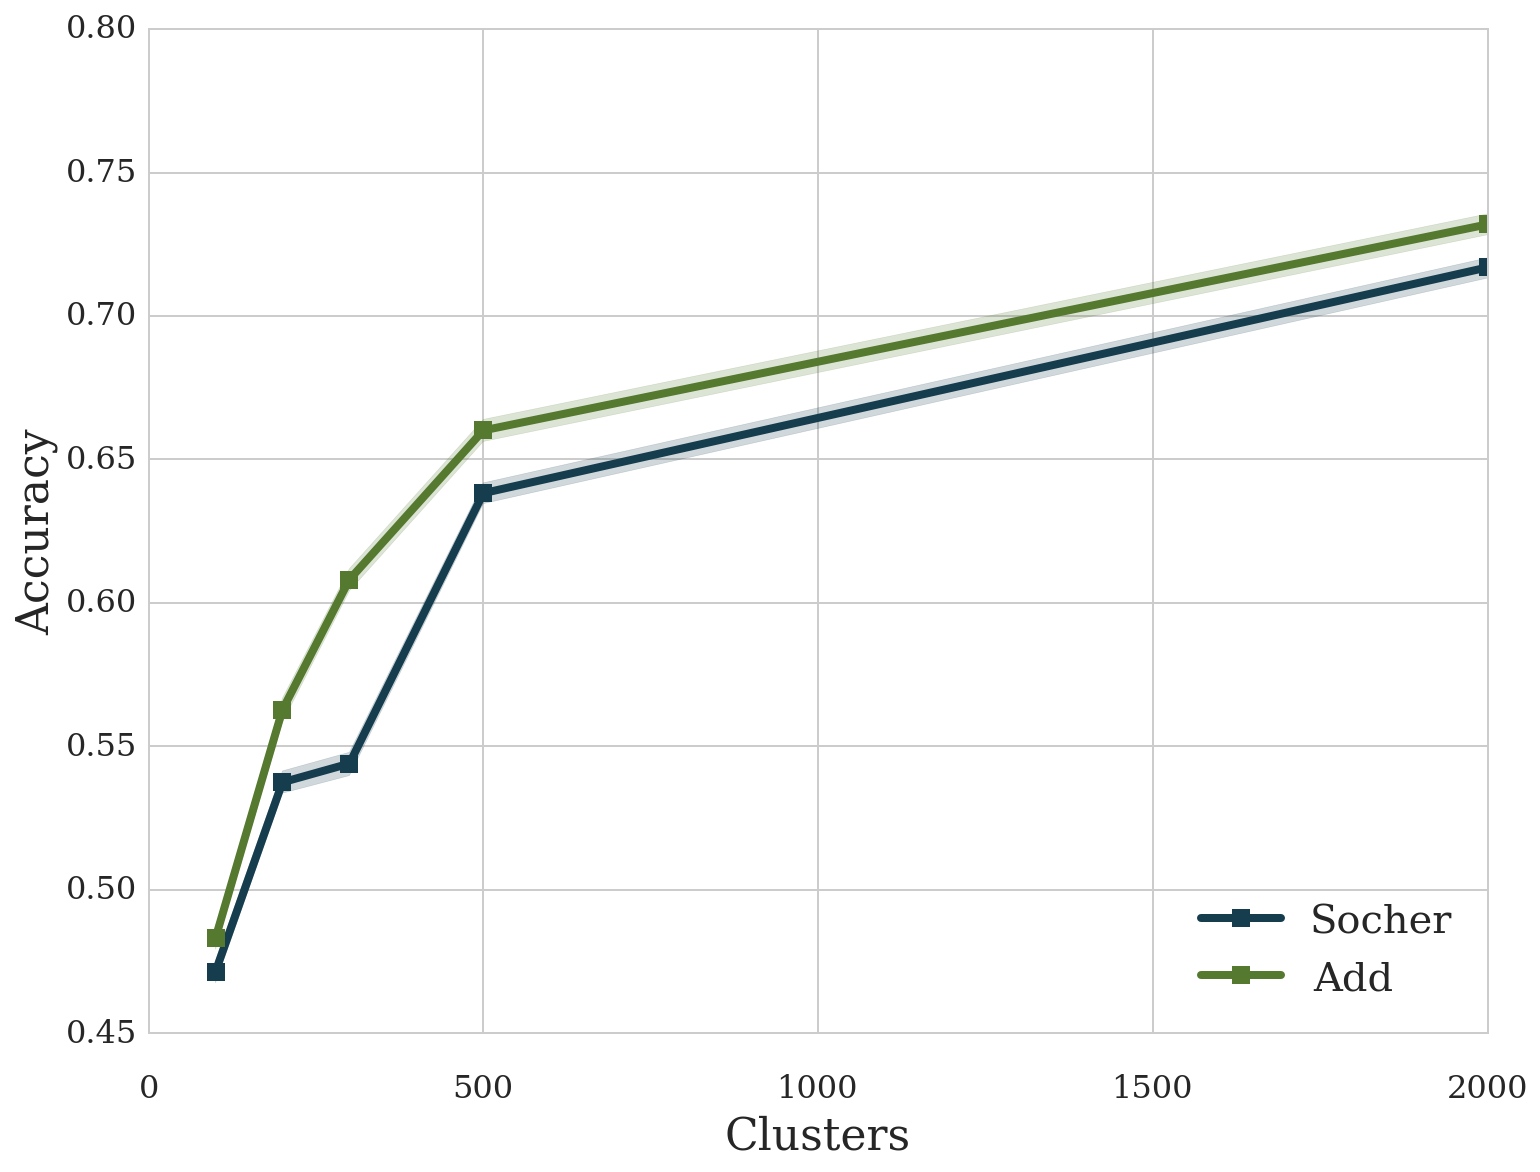

In [3]:
with sns.color_palette("cubehelix", 4):
    go(query_dict)
plt.savefig('plot-clusters1.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[250, 251, 252, 253, 254, 260, 261, 262, 263, 264]
Calculating CI for exp 250
Calculating CI for exp 251
Calculating CI for exp 252
Calculating CI for exp 253
Calculating CI for exp 254
Calculating CI for exp 260
Calculating CI for exp 261
Calculating CI for exp 262
Calculating CI for exp 263
Calculating CI for exp 264
Unlabelled has 5000 values
Clusters has 5000 values
folds has 5000 values
Accuracy has 5000 values
Composer has 5000 values


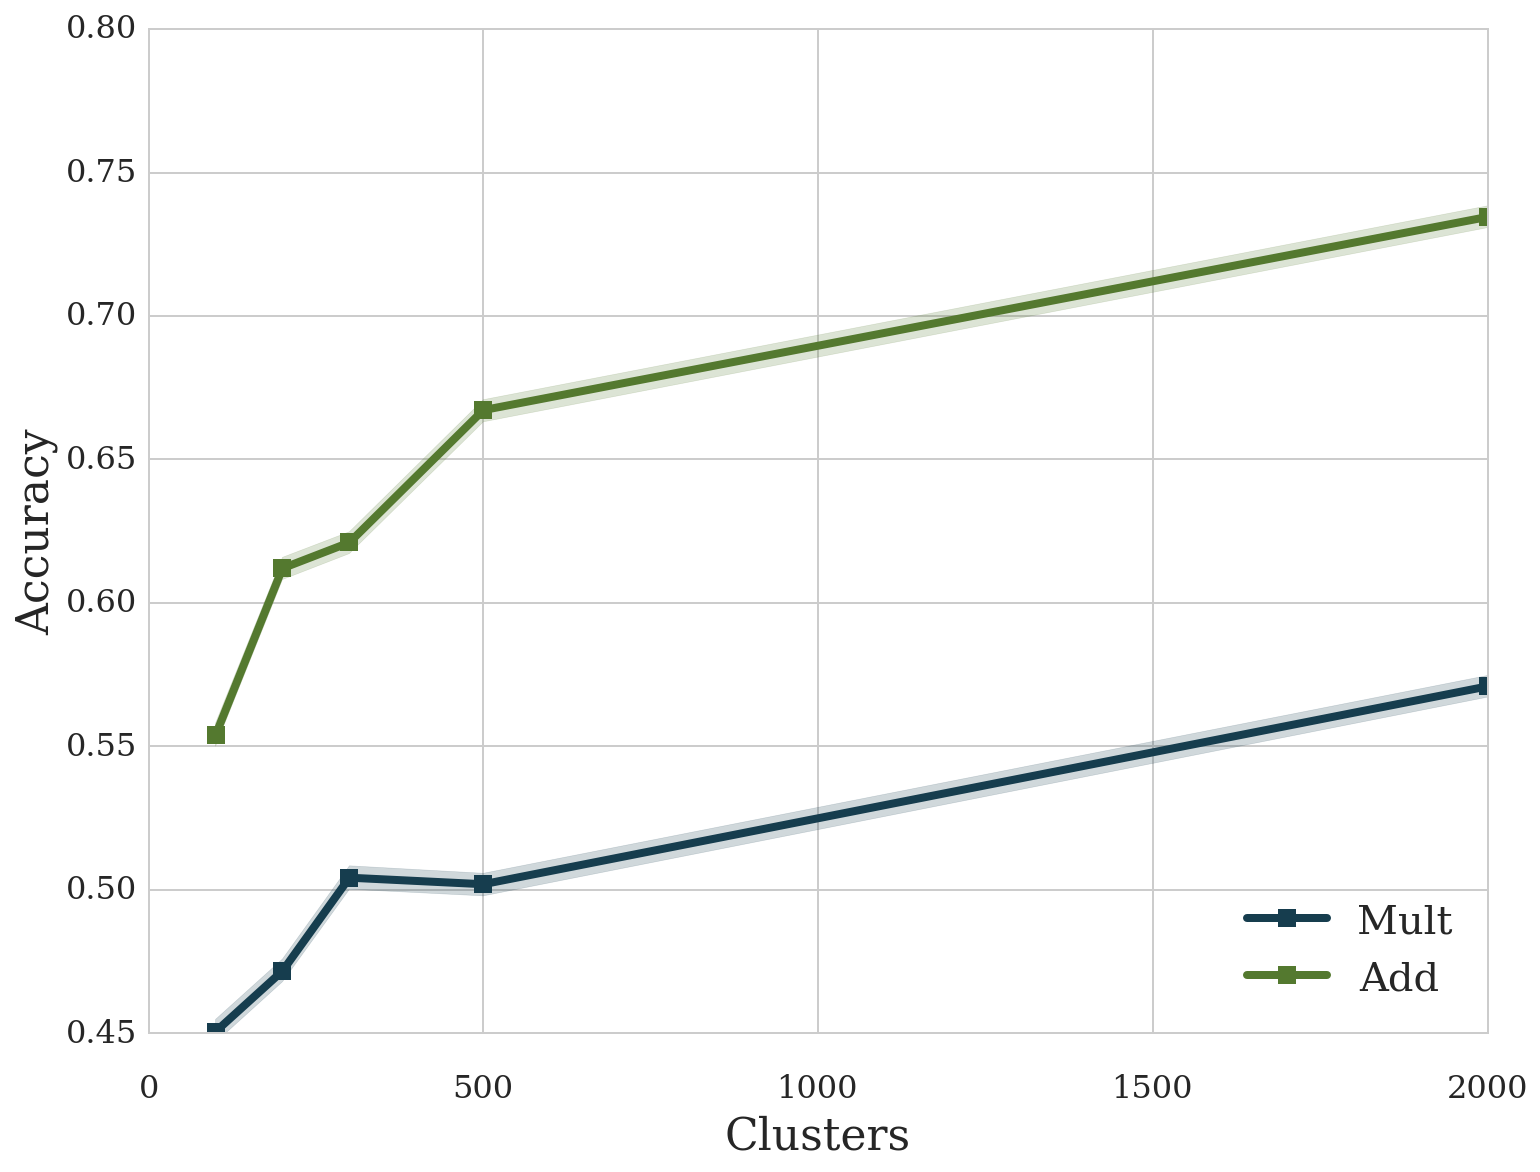

In [4]:
query_dict['clusters__vectors__algorithm__in'] = ['word2vec']
query_dict['clusters__vectors__composer__in'] = ['Add', 'Mult']
query_dict['clusters__vectors__unlabelled__in'] = ['gigaw']

with sns.color_palette("cubehelix", 4):
    go(query_dict)
plt.savefig('plot-clusters2.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[255, 256, 257, 258, 259, 265, 266, 267, 268, 269]
Calculating CI for exp 255
Calculating CI for exp 256
Calculating CI for exp 257
Calculating CI for exp 258
Calculating CI for exp 259
Calculating CI for exp 265
Calculating CI for exp 266
Calculating CI for exp 267
Calculating CI for exp 268
Calculating CI for exp 269
Unlabelled has 5000 values
Clusters has 5000 values
folds has 5000 values
Accuracy has 5000 values
Composer has 5000 values


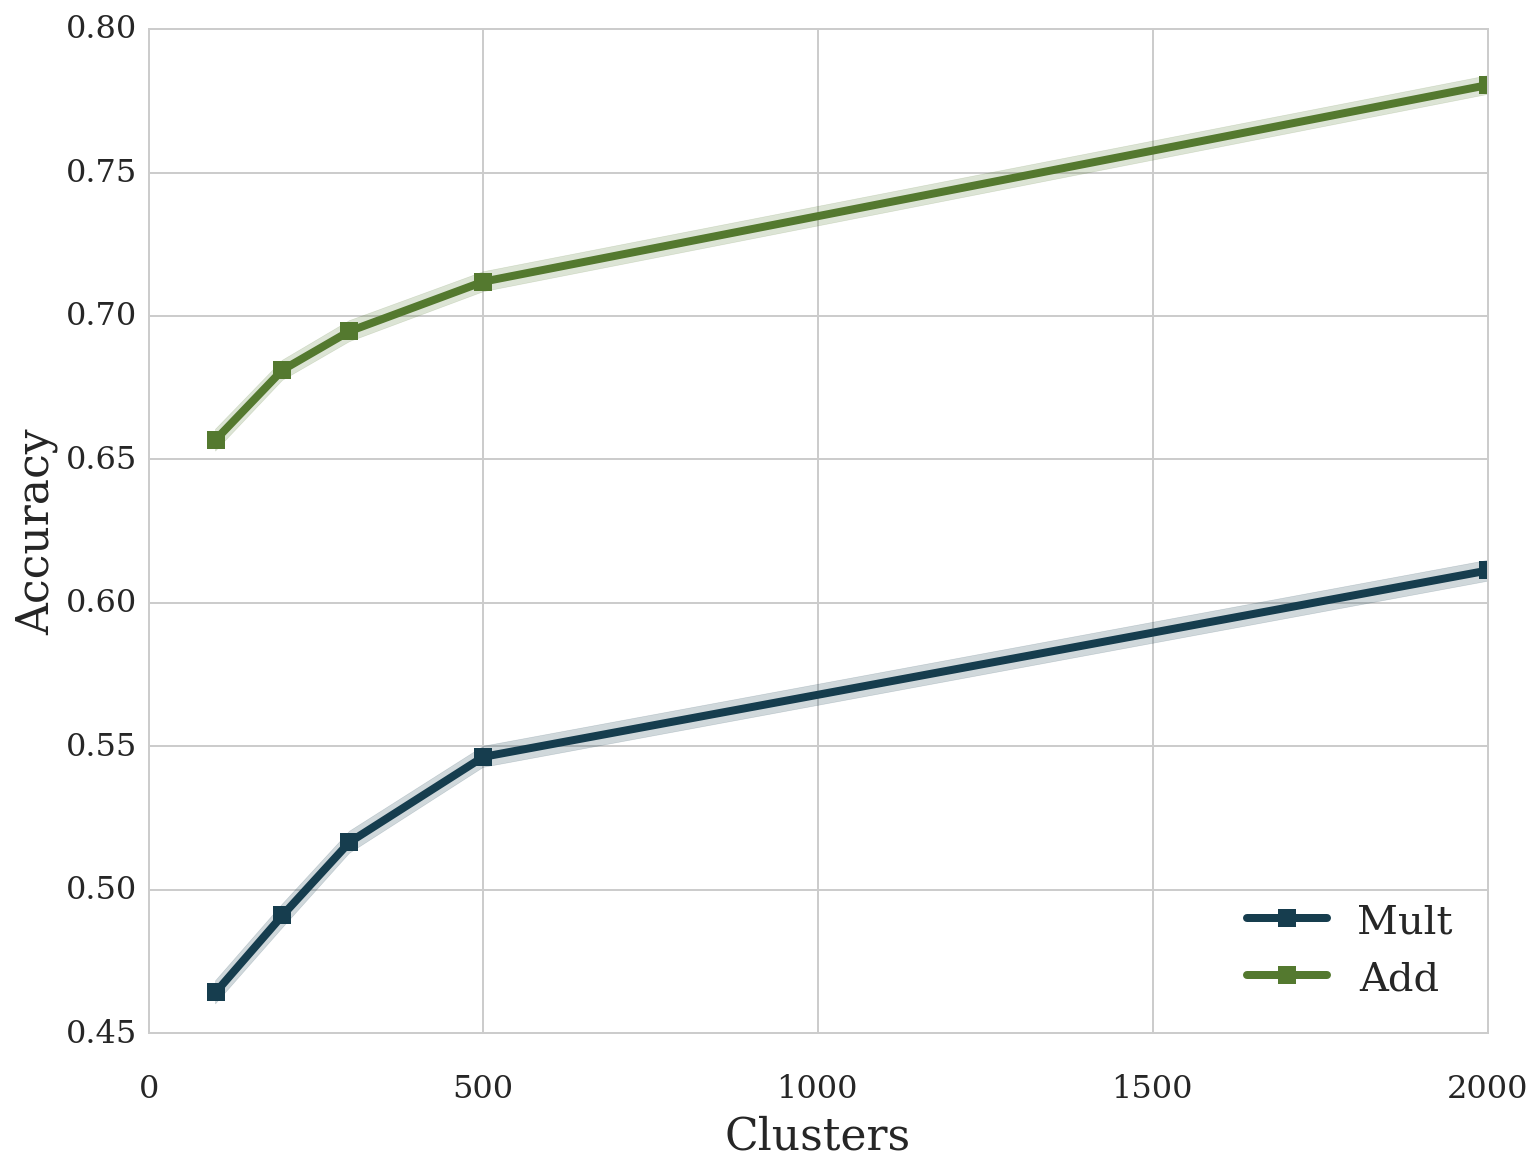

In [5]:
query_dict['clusters__vectors__unlabelled__in'] = ['wiki']
with sns.color_palette("cubehelix", 4):
    go(query_dict)
plt.savefig('plot-clusters3.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

[265, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]
Calculating CI for exp 286
Calculating CI for exp 287
Calculating CI for exp 288
Calculating CI for exp 289
Calculating CI for exp 290
Calculating CI for exp 291
Calculating CI for exp 292
Calculating CI for exp 293
Calculating CI for exp 294
Calculating CI for exp 295


/home/m/mm/mmb28/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



folds has 5500 values
Accuracy has 5500 values
Labelled has 5500 values
Percent has 5500 values


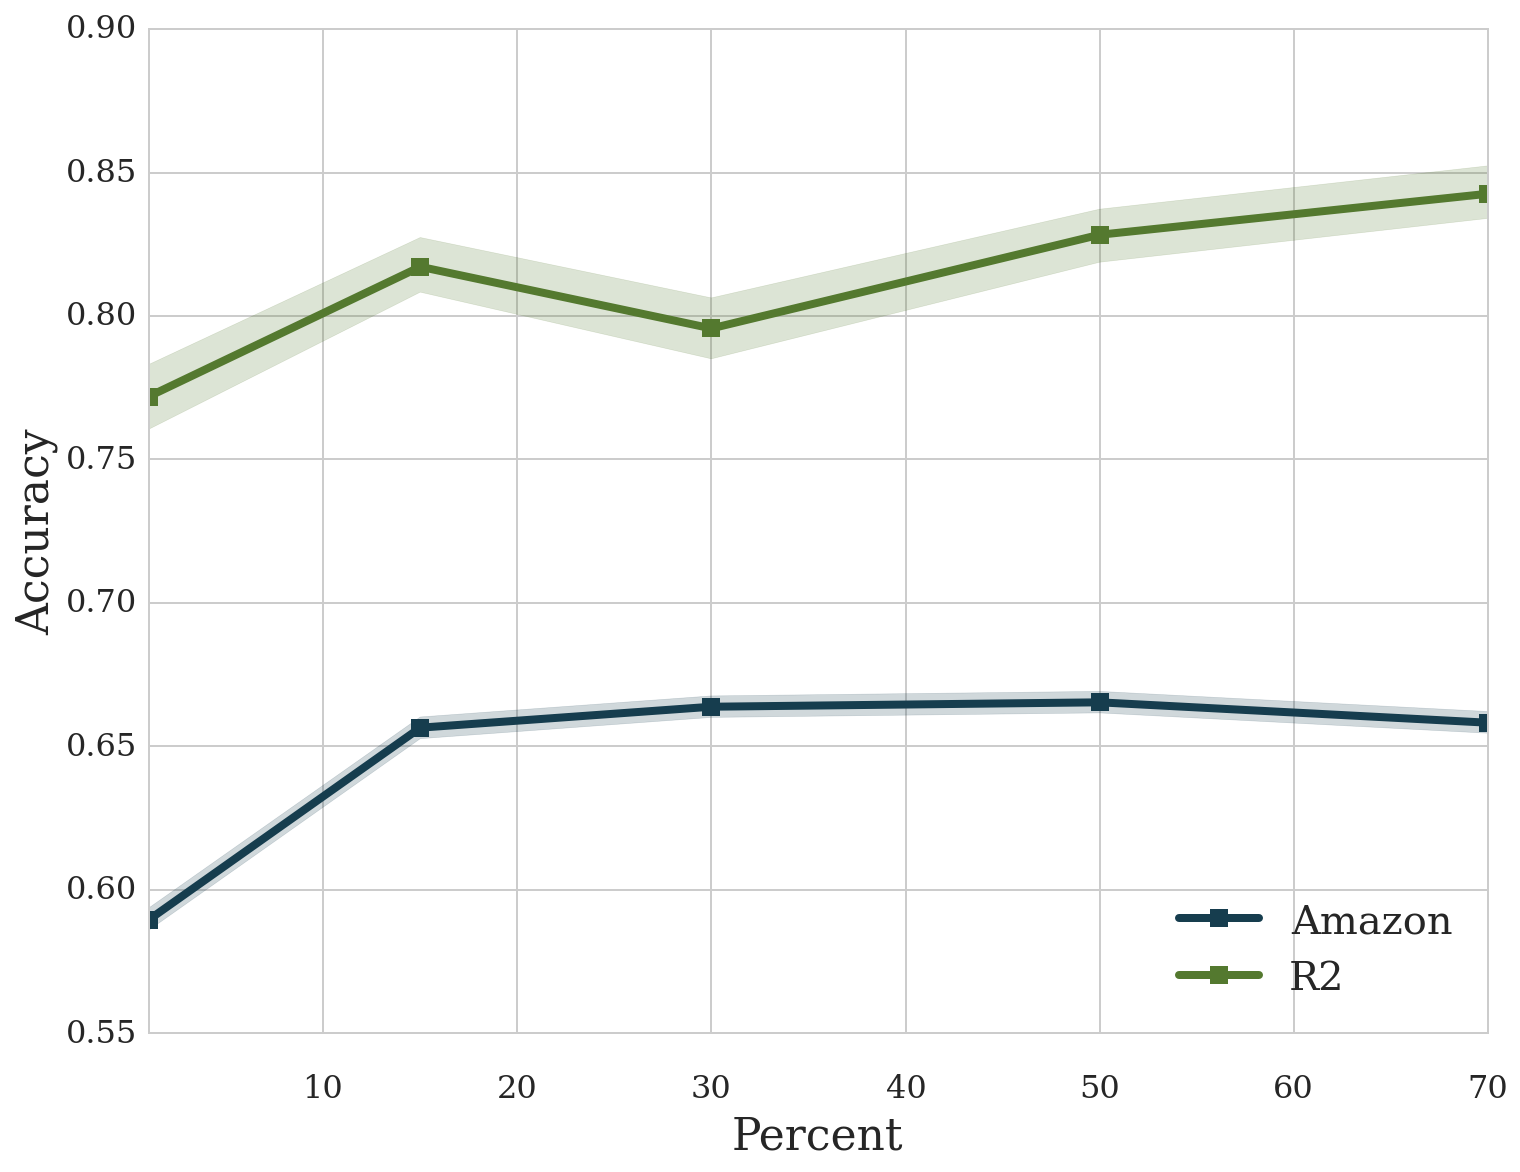

In [6]:
query_dict = {
'clusters__num_clusters': 100,
'clusters__vectors__algorithm': 'word2vec',
'clusters__vectors__composer': 'Add',
'clusters__vectors__dimensionality': 100,
'clusters__vectors__rep': 0,
'clusters__vectors__unlabelled': 'wiki',
# 'clusters__vectors__unlabelled_percentage': 70,
'document_features_ev': 'AN+NN',
'document_features_tr': 'J+N+AN+NN',
# 'labelled': 'amazon_grouped-tagged'
}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Labelled':'labelled', 
                                  'Percent':'clusters__vectors__unlabelled_percentage'})
df = df.convert_objects(convert_numeric=True)
df.Labelled[df.Labelled == 'AM'] = 'Amazon'
with sns.color_palette("cubehelix", 4):
    g = sns.tsplot(data=df, time='Percent', condition='Labelled', 
               value='Accuracy', unit='folds',
               marker='s', linewidth=4, ci=68);
g.legend(loc='lower right')
plt.savefig('plot-clusters4.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Ideally I want something like this, but seaborn is buggy 

[240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, '...(remaining elements truncated)...']
folds has 15000 values
Clusters has 15000 values
Composer has 15000 values
Accuracy has 15000 values
Unlabelled has 15000 values


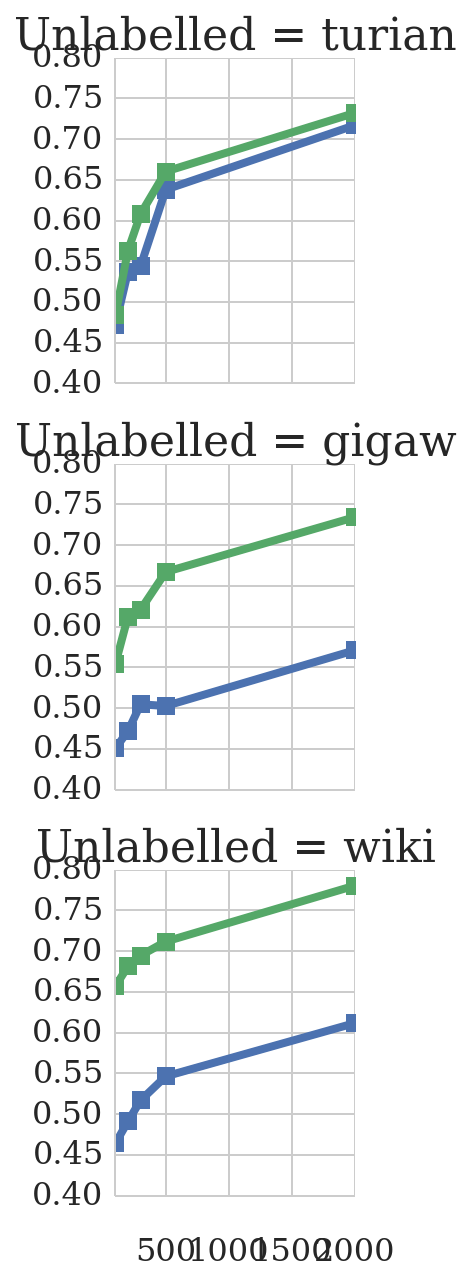

In [7]:
query_dict = {
             'clusters__vectors__algorithm__in': ['turian', 'word2vec'],
             'clusters__vectors__composer__in': ['Add', 'Socher', 'Mult'],
             'clusters__vectors__unlabelled__in': ['turian', 'wiki', 'gigaw'],
             'clusters__vectors__dimensionality': 100,
             'clusters__vectors__rep': 0,
             'clusters__vectors__unlabelled_percentage': 100,
             'document_features_ev': 'AN+NN',
             'document_features_tr': 'J+N+AN+NN',
             'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**query_dict).values_list('id', flat=True)
print(ids)
df = dataframe_from_exp_ids(ids, {'Clusters':'clusters__num_clusters', 
                                  'Composer':'clusters__vectors__composer',
                                  'Unlabelled':'clusters__vectors__unlabelled'})
df = df.convert_objects(convert_numeric=True)
g = sns.FacetGrid(df, row='Unlabelled')  
g.map_dataframe(tsplot_for_facetgrid, time='Clusters', condition='Composer', 
                   value='Accuracy', unit='folds',
                   marker='s', linewidth=4, ci=68);